### Image classification with dense network
### Souce:
https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

In [1]:
import tensorflow as tf
import numpy as np

from keras.datasets import mnist
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

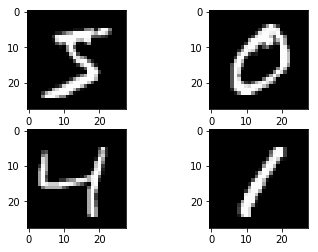

In [4]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [5]:
# flatten 28*28 image to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train    = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test     = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test  = X_test / 255

In [7]:
# one hot encode outputs
y_train_1h = np_utils.to_categorical(y_train)
y_test_1h  = np_utils.to_categorical(y_test)
num_classes = y_test_1h.shape[1]

In [8]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
# build the model
model = baseline_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [10]:
print(">>> Number of parameters in first layer: ", num_pixels*num_pixels + num_pixels)
print(">>> Number of parameters in second layer", 10*num_pixels + 10)

>>> Number of parameters in first layer:  615440
>>> Number of parameters in second layer 7850


In [11]:
# Fit the model
model.fit(X_train, y_train_1h, validation_data=(X_test, y_test_1h), epochs=20, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test_1h, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.2782 - acc: 0.9211 - val_loss: 0.1414 - val_acc: 0.9575
Epoch 2/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1114 - acc: 0.9676 - val_loss: 0.0924 - val_acc: 0.9703
Epoch 3/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0718 - acc: 0.9798 - val_loss: 0.0788 - val_acc: 0.9771
Epoch 4/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0503 - acc: 0.9856 - val_loss: 0.0751 - val_acc: 0.9767
Epoch 5/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0372 - acc: 0.9893 - val_loss: 0.0671 - val_acc: 0.9792
Epoch 6/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0270 - acc: 0.9926 - val_loss: 0.0632 - val_acc: 0.9802
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 0

### Note that acc during training is higher than in validation

In [12]:
#--- Lets test the model
y_pred = model.predict(X_test)

#--- This is how the output of softmax looks like
print(">>> True class: ", y_test[0])
print(">>> First prediction:", y_pred[0]/np.max(y_pred[0]))
print(">>> Sum of softmax", np.sum(y_pred[0]))

>>> True class:  7
>>> First prediction: [1.3417689e-12 2.4374261e-13 7.2369860e-10 5.5701543e-07 6.5625178e-15
 7.9682680e-13 9.4835595e-18 1.0000000e+00 2.3836022e-10 2.2738703e-08]
>>> Sum of softmax 0.99999994


In [13]:
#--- Convert from softmax to discrete class
y_pred = [ np.argmax(y_pred[i]) for i in range(len(y_pred[:,0]))]

In [14]:
#
#  https://www.kernix.com/blog/a-toy-convolutional-neural-network-for-image-classification-with-keras_p14
#
def plot_confusion_matrix(y_true,y_pred):
    cm_array = confusion_matrix(y_true,y_pred)
    true_labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    plt.imshow(cm_array, interpolation='nearest', cmap=plt.cm.jet)
    plt.title("Confusion matrix", fontsize=16)
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks,pred_labels)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size

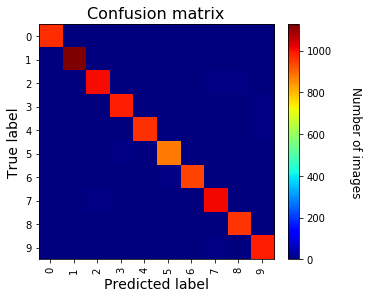

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
plot_confusion_matrix(y_test,y_pred)